### Esse notebook versa sobre a geração e pegada de carbono e seus principais influentes

# **Imports!**
Importando as bibliotecas necessárias para o desenvolvimento do projeto


pandas - gerenciamento de datasets  
matplotlib.pyplot - plotagem de gráficos  
statistics e scipy - métricas estatísticas  
sklearn - todas as métricas de machine learning necessárias para esse projeto

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import variance
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

Lendo os datasets utilizando pandas

In [26]:
data_countries = pd.read_csv('Carbon_(CO2)_Emissions_by_Country.csv')
data_influents = pd.read_csv("Carbon Emission.csv")

# **Describe!**
Utilizando o método describe para avaliar informações estatísticas dos datasets, sendo elas  
- contagem 
- média
- desvio padrão 
- valor mínimo 
- primeiro quartil
- segundo quartil (mediana)
- terceiro quartil
- valor máximo  
(aparece respectivamente na função)

*dataset de países*

In [37]:
data_influents

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,Not informed,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,Not informed,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,Not informed,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,Not informed,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


In [42]:
data_countries

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17
...,...,...,...,...,...
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61


In [17]:
data_countries.describe()

,Kilotons of Co2,Metric Tons Per Capita
count,5.677000e+03,5677.000000
mean,1.412292e+05,4.325505
std,6.491258e+05,5.503834
min,0.000000e+00,0.000000
25%,1.380000e+03,0.570000
50%,9.170000e+03,2.360000
75%,5.848000e+04,6.340000
max,1.070722e+07,47.650000


*dataset de influentes*

In [15]:
data_influents.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


# **Isnull()!**
Utilizando a função *isnull().any()* para verificar se algum valor em alguma coluna do dataset é nula

*dataset de países*

In [ ]:
data_countries.isnull().any()

Country                   False
Region                    False
Date                      False
Kilotons of Co2           False
Metric Tons Per Capita    False
dtype: bool

*dataset de influentes*

In [19]:
data_influents.isnull().any()

Body Type                        False
Sex                              False
Diet                             False
How Often Shower                 False
Heating Energy Source            False
Transport                        False
Vehicle Type                      True
Social Activity                  False
Monthly Grocery Bill             False
Frequency of Traveling by Air    False
Vehicle Monthly Distance Km      False
Waste Bag Size                   False
Waste Bag Weekly Count           False
How Long TV PC Daily Hour        False
How Many New Clothes Monthly     False
How Long Internet Daily Hour     False
Energy efficiency                False
Recycling                        False
Cooking_With                     False
CarbonEmission                   False
dtype: bool

# **Found null value!**
Como um ou mais valores nulos foram encontrados no dataset, e não queremos eles nas visualizações ou funções,  
é criada então uma query para alterar onde, em 'Vehicle Type', for nulo, para 'Not informed'

In [28]:
data_influents['Vehicle Type'][data_influents['Vehicle Type'].isnull()] = 'Not informed'

C:\Users\vitor\AppData\Local\Temp\ipykernel_19836\3995456506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_influents['Vehicle Type'][data_influents['Vehicle Type'].isnull()] = 'Not informed'


# **Violin plots!**
Gerando violin plots para cada coluna dos datasets para avaliar, visualmente, a possível existência de outliers

Antes de tudo, será necessário separar as colunas categóricas das numéricas, pois os gráficos não conseguem gerar visualizações de palavras!

In [39]:
data_countries_numerics = data_countries.drop(['Country', 'Region', 'Date'], axis=1)
data_influents_numerics = data_influents[['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'CarbonEmission']]

*dataset de países*

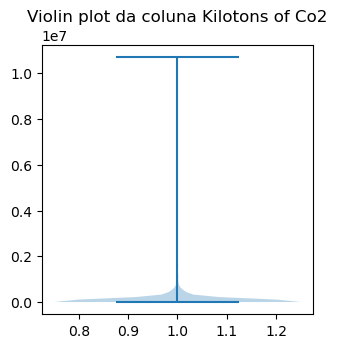

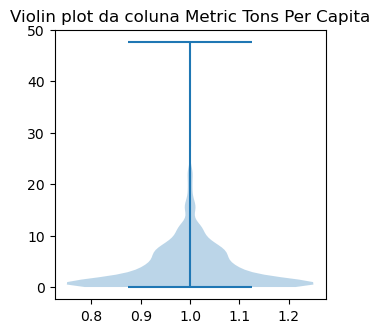

In [40]:
for i in data_countries_numerics.columns:
    plt.figure(figsize=(3.5, 3.5))
    plt.title(f"Violin plot da coluna {i}")
    plt.violinplot(data_countries[i])
    plt.show()

*dataset de influentes*

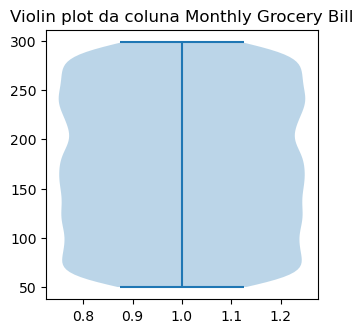

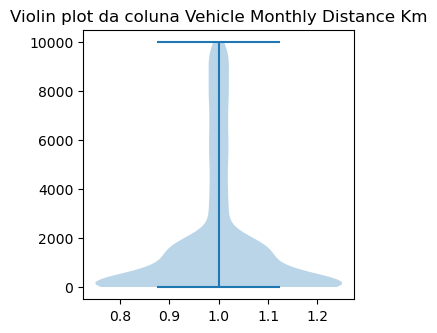

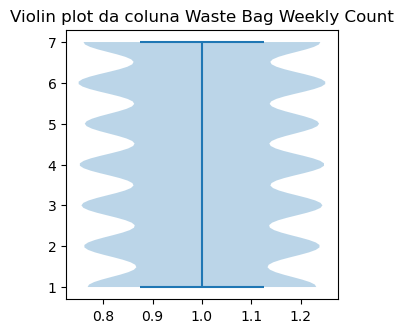

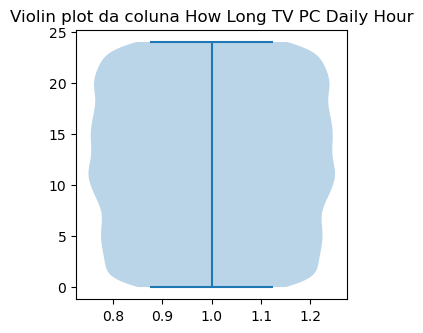

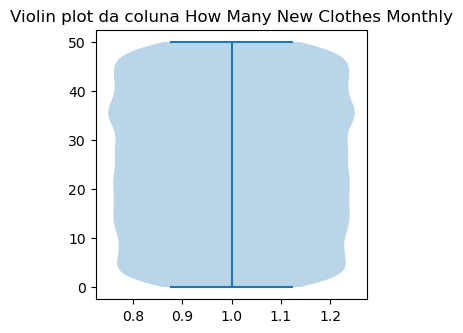

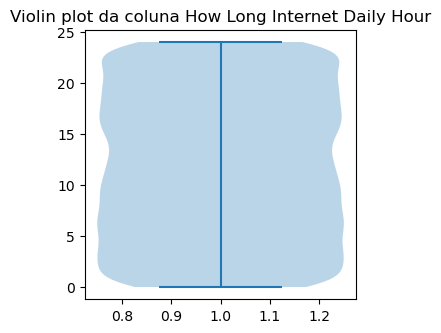

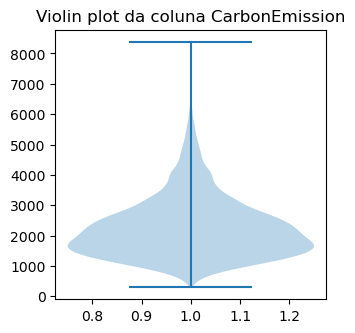

In [41]:
for i in data_influents_numerics.columns:
    plt.figure(figsize=(3.5, 3.5))
    plt.title(f"Violin plot da coluna {i}")
    plt.violinplot(data_influents[i])
    plt.show()

Como os gráficos do dataset de países chamou atenção por conta do valor máximo não acompanhar a distribuição dos dados, será necessário comparar a média com a mediana

In [45]:
for i in data_countries_numerics.columns:
    print(f'Coluna {i} -- Média: {data_countries_numerics[i].mean()} -- Mediana: {data_countries_numerics[i].median()}')

Coluna Kilotons of Co2 -- Média: 141229.16497445834 -- Mediana: 9170.0
Coluna Metric Tons Per Capita -- Média: 4.325504667958429 -- Mediana: 2.36


Coluna Metric Tons Per Capita está OK  
Coluna Kilotons of Co2 continua chamando atenção

In [71]:
data_countries[data_countries['Kilotons of Co2']>5000000]

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
1050,China,Asia,01-01-2019,10707219.73,7.61
1051,China,Asia,01-01-2018,10502929.69,7.49
1052,China,Asia,01-01-2017,10096009.77,7.23
1053,China,Asia,01-01-2014,10006669.92,7.29
1054,China,Asia,01-01-2013,9984570.31,7.32
1055,China,Asia,01-01-2016,9874660.16,7.12
1056,China,Asia,01-01-2015,9861099.61,7.15
1057,China,Asia,01-01-2012,9541870.12,7.05
1058,China,Asia,01-01-2011,9282549.80,6.90
1059,China,Asia,01-01-2010,8474919.92,6.34


# **Statistics!**
Criando a aplicação de métricas estatísticas para avaliar pontos como:
- Distribuição de dados nos datasets
- Correlação entre as colunas dos datasets
- Plotagem de gráficos
- Testes de hipótese


Para analisar a variabilidade e a distribuição, serão obtidas as métricas:
- Desvio padrão
- Variância
- Coeficiente de variação

In [89]:
for i in data_countries_numerics:
    print(f"Coluna {i} - Média: {data_countries_numerics[i].mean()}")
    print(f"Coluna {i} - STD: {data_countries_numerics[i].std()}")
    print(f"Coluna {i} - Variance: {variance(data_countries_numerics[i])}")
    print(f"Coluna {i} - Coefficient of variation: {((data_countries_numerics[i].std()/data_countries_numerics[i].mean())*100).round(2)}%")
    print(""*20)
    
print("-"*80)
    
for j in data_influents_numerics:
    print(f"Coluna {j} - Média: {data_influents_numerics[j].mean()}")
    print(f"Coluna {j} - STD: {data_influents_numerics[j].std()}")
    print(f"Coluna {j} - Variance: {variance(data_influents_numerics[j])}")
    print(f"Coluna {j} - Coefficient of variation: {((data_influents_numerics[j].std()/data_influents_numerics[j].mean())*100).round(2)}%")
    print(""*20)


Coluna Kilotons of Co2 - Média: 141229.16497445834
Coluna Kilotons of Co2 - STD: 649125.8221990395
Coluna Kilotons of Co2 - Variance: 421364333045.57733
Coluna Kilotons of Co2 - Coefficient of variation: 459.63%

Coluna Metric Tons Per Capita - Média: 4.325504667958429
Coluna Metric Tons Per Capita - STD: 5.503833555381449
Coluna Metric Tons Per Capita - Variance: 30.2921838053429
Coluna Metric Tons Per Capita - Coefficient of variation: 127.24%

--------------------------------------------------------------------------------
Coluna Monthly Grocery Bill - Média: 173.8752
Coluna Monthly Grocery Bill - STD: 72.23401830370527
Coluna Monthly Grocery Bill - Variance: 5217.75340030003
Coluna Monthly Grocery Bill - Coefficient of variation: 41.54%

Coluna Vehicle Monthly Distance Km - Média: 2031.4859
Coluna Vehicle Monthly Distance Km - STD: 2769.7155969250566
Coluna Vehicle Monthly Distance Km - Variance: 7671324.487849975
Coluna Vehicle Monthly Distance Km - Coefficient of variation: 136.3

# **Correlation!**

Entendendo as correlações entre as variáveis de cada dataset!

In [ ]:
data_countries_numerics.corr()

,Kilotons of Co2,Metric Tons Per Capita
Kilotons of Co2,1.000000,0.196364
Metric Tons Per Capita,0.196364,1.000000


In [93]:
data_influents_numerics.corr()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
Monthly Grocery Bill,1.000000,0.015801,0.002343,-0.010318,0.006746,0.012798,0.081587
Vehicle Monthly Distance Km,0.015801,1.000000,-0.001730,-0.003943,0.004934,-0.003497,0.594171
Waste Bag Weekly Count,0.002343,-0.001730,1.000000,-0.011640,-0.003254,-0.005335,0.159193
How Long TV PC Daily Hour,-0.010318,-0.003943,-0.011640,1.000000,0.009414,0.006804,0.012985
How Many New Clothes Monthly,0.006746,0.004934,-0.003254,0.009414,1.000000,0.006426,0.198887
How Long Internet Daily Hour,0.012798,-0.003497,-0.005335,0.006804,0.006426,1.000000,0.043878
CarbonEmission,0.081587,0.594171,0.159193,0.012985,0.198887,0.043878,1.000000


## Plotando essas correlações para visualizar e entender melhor  
Utilizando gráfico de calor do seaborn

*dataset de países*

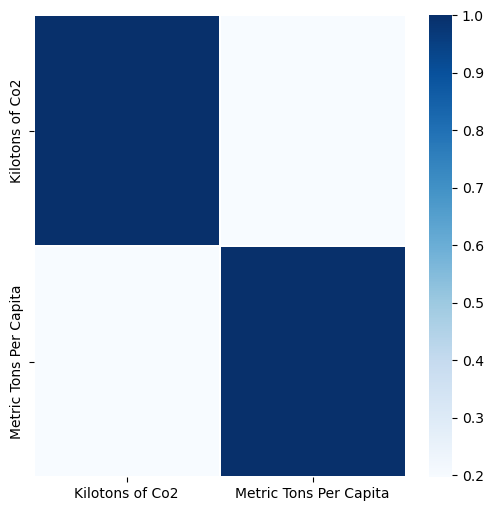

In [96]:
plt.figure(figsize=(6,6))
sns.heatmap(data_countries_numerics.corr(), cmap='Blues', linewidths=0.1)
plt.show()

*dataset de influentes*

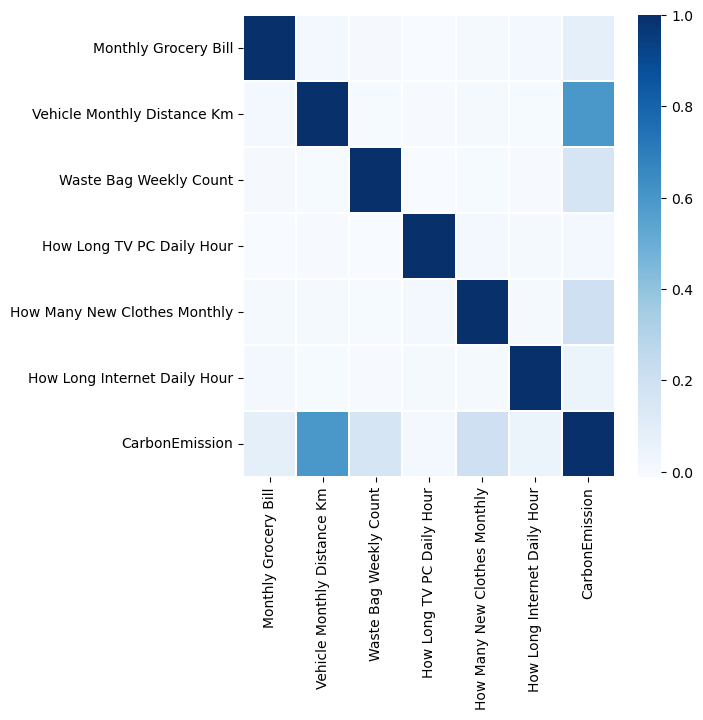

In [97]:
plt.figure(figsize=(6,6))
sns.heatmap(data_influents_numerics.corr(), cmap='Blues', linewidths=0.1)
plt.show()

# **ScatterPlot!**  
Plotando scatterplot para as colunas com maior correlação 

*kms por mês X emissão de carbono*

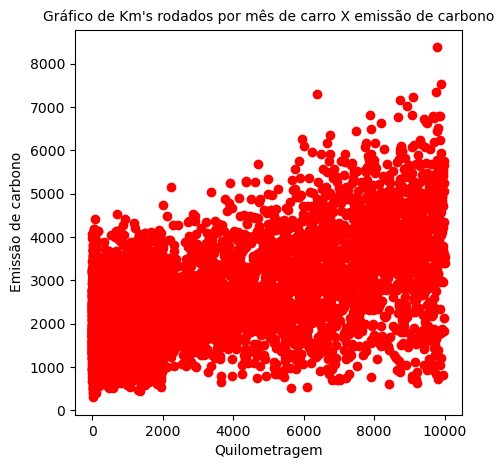

In [98]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de Km's rodados por mês de carro X emissão de carbono", fontsize=10)
plt.xlabel('Quilometragem')
plt.ylabel('Emissão de carbono')
plt.scatter(data_influents['Vehicle Monthly Distance Km'],data_influents['CarbonEmission'], color='red')
plt.show()


*quantidade de roupas novas por mês x emissão de carbono*

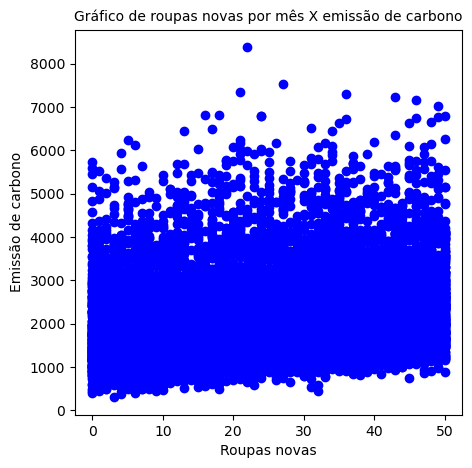

In [109]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de roupas novas por mês X emissão de carbono", fontsize=10)
plt.xlabel('Roupas novas')
plt.ylabel('Emissão de carbono')
plt.scatter(data_influents['How Many New Clothes Monthly'],data_influents['CarbonEmission'], color='blue')
plt.show()

*valor mensal gasto em supermercados X emissão de carbono*

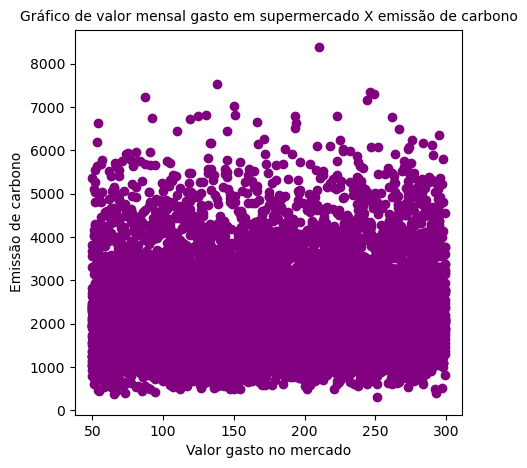

In [110]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de valor mensal gasto em supermercado X emissão de carbono", fontsize=10)
plt.xlabel('Valor gasto no mercado')
plt.ylabel('Emissão de carbono')
plt.scatter(data_influents['Monthly Grocery Bill'],data_influents['CarbonEmission'], color='purple')
plt.show()

*quantidade de sacolas de lixo utilizadas por semana X emissão de carbono*

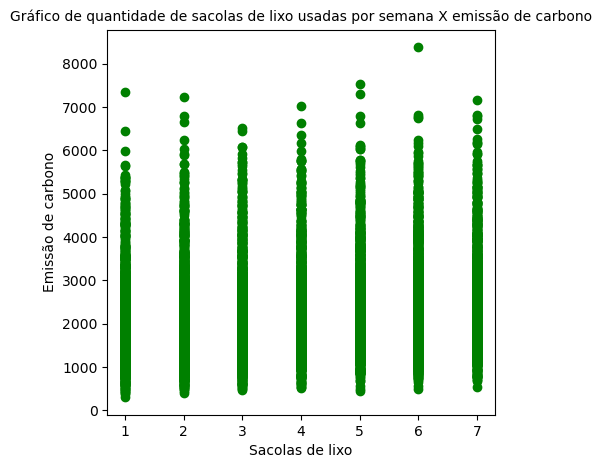

In [111]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de quantidade de sacolas de lixo usadas por semana X emissão de carbono", fontsize=10)
plt.xlabel('Sacolas de lixo')
plt.ylabel('Emissão de carbono')
plt.scatter(data_influents['Waste Bag Weekly Count'],data_influents['CarbonEmission'], color='green')
plt.show()

# **Hypotesis Test!**  
Criação de uma função que fará o teste de hipótese para confirmar (ou não) as correlações!

- **Graus de liberdade:** É o número de opções que temos para fazer os cálculos.  
- **Chi²:** Serve para ver se as contagens que foram observadas são diferentes do que era esperado.  
- **Frequências esperadas:** São os números que deveriam aparecer se tudo estivesse normal.  
- Se o **valor p** for menor que o nível de significância (0.05), a hipótese nula é rejeitada  
    
    - valor p é comparado com 0.05, mas esse valor pode mudar, 0.05 é o padrão, entretanto tudo irá depender do que o estudo pede

In [ ]:
#Criação de uma função para criação de testes de hipótese
def testes_de_hipotese(coluna1, coluna2):
    #Criação da tabela de contingência para juntar os dois datasets
    tabela_cont = pd.crosstab(coluna1, coluna2)
    #Recebendo as informações a partir do stats da biblioteca scipy
    #chi2 - qui-quadrado
    #p - valor p
    #graus_lib - graus de liberdade
    #df_esperado - dados esperados em comparação com os reais
    chi2, p, graus_lib, df_esperado = stats.chi2_contingency(tabela_cont)

    #Printando os valores
    print(f'Chi-square: {chi2}')
    print(f'Valor p: {p}')
    print(f'Graus de liberdade: {graus_lib}')
    print('Frequências:')
    #Transformando o array de valores esperados em um dataset para melhor visualização
    df_esperado = pd.DataFrame(df_esperado)
    print(df_esperado)
    
    #Analisando se a hipótese nula irá ser rejeitada ou não
    if p < 0.05:
        print(f'Por conta do valor p ({p}), a hipótese nula foi rejeitada')
    else:
        print(f'Por conta do valor p ({p}), a hipótese nula não foi rejeitada')